## Analyzing the Relation Between Renewable Energy and Carbon Emissions Globally over Time
Varun Das and Ishaan Bhardvaj

## Introduction
This project intends to inform you of the fundamentals of data science. The vast field involves countless libraries, methods, models, etc. but this project will be a simple walkthrough for basic steps when manipulating data. These include data curation, parsing, and management; exploratory data analysis; hypothesis testing and machine learning modeling; and a review insights from our data maniipulation. 

To display these steps, we will ananlyze the connection between renewable energy and carbon emissions over time for different countries. Renewable energy is defined as energy from a source that is not depleted. Examples of this include solar energy or wind energy. Renewable energy is more environmentally friendly than nonrenewable energy which refers to energy that does deplete when used like oil or gas. Nonrewable energy tends to produce more carbon emissions as a result. We aim to analyze how strong the correlation is between using renewable energy is in reducing carbon emissions, which can be harmful for our atmosphere. 

We can find how the two variables vary by countries to potentially find which countries do it more eficiently and observe trends in the prevalance of using renewable energy.  We will also specifically predict our data for future years to evaluate if we are on track with the amount of renewable energy we use currently, or if we need to implement policy to create a sustainable future for our planet and future generations to come. 

## Data Curation
We want to find informative data sets for our topic to conduct data analysis. For the topic of renewable energy and carbon emissions, we look for such data sets. We must also choose a data source that is credible. 

We are able to find data sets for both at https://ourworldindata.org/ which is a credible source, ending with .org as well. One dataset is for renewable energy (https://ourworldindata.org/renewable-energy) while the other is for carbon emissions https://ourworldindata.org/co2-emissions(). 

We can switch to the table format on the website and click download as csv. We will create a file for our code and add that file along with these data files to one folder/directory in our computer with a name of our choice (ex. RenewableVSCarbon). 

During this project we will be using Python and Jupiter Notebook to create our code.

First, we must import all of the libraries that we will use throughout our project in a single cell, which is done below. We only need to run this specific cell once unless we add more libraries later. Pandas is the main library we will use for this project which helps us manipulate the data with ease and nuance. The numpy and scipy libraries allow us to make large computations and mathematical operations when we need. The Seaborn and Matplotlib libraries let us graph our models for easy visialization, and the sklearn models allow us to utilize machine learning techniques and models. 

Imports

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



Now we must load our datasets into our coding file with pandas. We do this for each of our two files and store them in respective pandas dataframes. 

In [38]:
# Load the renewable energy dataset
renewable_energy_df = pd.read_csv('renewable-share-energy.csv')

# Load the carbon emissions dataset
carbon_emissions_df = pd.read_csv('annual-co2-emissions-per-country.csv')

## Data Processing
Now that we have loaded all of our raw data, we want to mannipulate it so that is the most useful for us. We must clean our data, which refers to the process of fixing or getting rid of incorrect, incomplete, or unusable data, along with formatting our dataset so it is easy to follow and interpret.

Both of our datasets share the same three columns of entity, code, and year, and the renewable energy dataset has a column with that and the carbon emissions has a column relating to that. We can observe that in the original datasets, there are rows in both data sets that have missing values. Specifically, some rows are empty for the code entry, listing nan. There are two approaches to this: We can fill in these values using a certain technique (maybe take the average of other values for example), or we can simply just remove those points. 

For this project, we will do the latter. Below we drop the rows in both datasets that have any missing entries, and display our renewable energy dataframe after. Notice that now we only have the rows with complete data. 

Drop missing rows

In [39]:
renewable_energy_df.dropna(inplace=True)
carbon_emissions_df.dropna(inplace=True)

# Display renewable dataset
renewable_energy_df.head 

<bound method NDFrame.head of        Entity      Code  Year  Renewables (% equivalent primary energy)
116   Algeria       DZA  1965                                  4.763068
117   Algeria       DZA  1966                                  3.518747
118   Algeria       DZA  1967                                  4.291954
119   Algeria       DZA  1968                                  5.486195
120   Algeria       DZA  1969                                  3.182763
...       ...       ...   ...                                       ...
4782    World  OWID_WRL  2018                                 11.766204
4783    World  OWID_WRL  2019                                 12.248977
4784    World  OWID_WRL  2020                                 13.430855
4785    World  OWID_WRL  2021                                 13.452535
4786    World  OWID_WRL  2022                                 14.213598

[3460 rows x 4 columns]>

We also want to get rid of unnecessary data. We notice that we have a code column in both datasets which is just an abbreviation of a country. Having both a country and code column is redudant, so we choose to get rid of the code column in both datasets below.

Drop code column

In [40]:
renewable_energy_df = renewable_energy_df.drop(columns=['Code'])
carbon_emissions_df = carbon_emissions_df.drop(columns=['Code'])



It is common for data scientists to standardize a datset. Standardize a dataset is a data processing technique which brings all datapoints to a common scale so they can be compared, by comparing each data point to its mean and standard deviation. This is done through using the standardization formula (https://statisticsbyjim.com/glossary/standardization/#:~:text=Typically%2C%20to%20standardize%20variables%2C%20you,divide%20by%20the%20standard%20deviation.) on every data point. 

Renewables are measured as a percent of primary energy in our database, while carbon emissions is measured in an amount, and it could be helpful to make them into the same unit. We will not be using standardization for the sake of this project, but we have given an example below for both the datasets since it is prevalent in data science.

Standardizing the renewable energy dataset

In [41]:

# Create a StandardScaler object
scaler = StandardScaler()

std_df = renewable_energy_df.copy(deep=True)

# Standardize the energy column
std_df['Renewable_Energy_Consumption_Standardized'] = scaler.fit_transform(renewable_energy_df[['Renewables (% equivalent primary energy)']])

# Display the front of the dataset with standardized feature
print("Merged Dataset with Standardized Feature:")
print(std_df.head())

Merged Dataset with Standardized Feature:
      Entity  Year  Renewables (% equivalent primary energy)  \
116  Algeria  1965                                  4.763068   
117  Algeria  1966                                  3.518747   
118  Algeria  1967                                  4.291954   
119  Algeria  1968                                  5.486195   
120  Algeria  1969                                  3.182763   

     Renewable_Energy_Consumption_Standardized  
116                                  -0.485592  
117                                  -0.583562  
118                                  -0.522685  
119                                  -0.428658  
120                                  -0.610015  


Standardizing the carbon emissions dataset

In [42]:
# Create a StandardScaler object
scaler = StandardScaler()

std_df = carbon_emissions_df.copy(deep=True)

# Standardize the 'Renewable_Energy_Consumption' feature
std_df['Carbon_Emissions_Standardized'] = scaler.fit_transform(carbon_emissions_df[['Annual CO₂ emissions']])

# Display the first few rows of the dataset with standardized feature
print("Merged Dataset with Standardized Feature:")
print(std_df.head())

Merged Dataset with Standardized Feature:
        Entity  Year  Annual CO₂ emissions  Carbon_Emissions_Standardized
0  Afghanistan  1949               14656.0                      -0.107514
1  Afghanistan  1950               84272.0                      -0.107463
2  Afghanistan  1951               91600.0                      -0.107457
3  Afghanistan  1952               91600.0                      -0.107457
4  Afghanistan  1953              106256.0                      -0.107446


We now want to combine our datasets so we can view all of our data together. We want to combine all of our columns without having any columns repeated, so we will use an outer join. More information about different ways of merging data can be found here: https://nanonets.com/blog/what-is-data-merging/.

Merge the datasets on entity and year

In [43]:
merged_df = pd.merge(renewable_energy_df, carbon_emissions_df, on=['Entity', 'Year'])


We also want our datapoints to be consistent with a certain start time. For example, we don't want a country to have datapoints from 1960 to the present while another one's data only starts in 1980. To combat this, we choose to only include data after 1980 because all countries have recorded data from 1980 onwards, according to inspecting the dataset or reading the description of the dataset on the website.

Filter dataset by year

In [44]:

merged_df = merged_df[merged_df['Year'] >= 1980]

merged_df

,Entity,Year,Renewables (% equivalent primary energy),Annual CO₂ emissions
15,Algeria,1980,0.429002,6.641646e+07
16,Algeria,1981,0.502940,4.634198e+07
17,Algeria,1982,0.570870,3.917303e+07
18,Algeria,1983,0.256449,5.250391e+07
19,Algeria,1984,0.513674,7.094654e+07
...,...,...,...,...
3435,World,2018,11.766204,3.676694e+10
3436,World,2019,12.248977,3.704010e+10
3437,World,2020,13.430855,3.500774e+10
3438,World,2021,13.452535,3.681654e+10


## Exploratory Data Analysis 
We are now at the next step of our data science journey for this datset. We are now going to try to really understand our data ourselves. We can start by looking at certain statistics and by visializing our data by graphing it to better interpret it in various ways. We will also check for basic correlation between our two variables.

Calculating summary statistics like mean, median, standard deviation, minimum, maximum, and even quartiles can be beneficial when you're analyzing and interpreting datasets. They can give us an overall summary of the data, point out obvious outliers, and for the comparison between data. Below we calculate summary statistics for our dataset. 

Observe that the mean and median for year do not really matter, but they might have more significance for renewable energy and carbon emissions. The max percentage of renwables as primary energy is 74, showing us that a country out there now or at some point had a very high rate. We may want to specifically analyze this country to see what policies they have implemented and if they have been succesful. This is just one example of a conclusion we can make. 

Calculate summary statistics

In [45]:
summary_stats = merged_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
              Year  Renewables (% equivalent primary energy)  \
count  2823.000000                               2823.000000   
mean   2001.850514                                 11.437188   
std      12.084027                                 13.215641   
min    1980.000000                                  0.000000   
25%    1992.000000                                  2.224697   
50%    2002.000000                                  6.482293   
75%    2012.000000                                 16.566990   
max    2022.000000                                 74.301690   

       Annual CO₂ emissions  
count          2.823000e+03  
mean           8.000394e+08  
std            3.586267e+09  
min            3.495134e+06  
25%            4.387100e+07  
50%            1.042960e+08  
75%            3.303355e+08  
max            3.714979e+10  


Let us now visualize our data for renewables. It is important to pick the right type of graph to best show our data. We choose to plot our data on a line plot to show the consumption over time. Something like a pie chart would not be helpful for us as that graph aims to show a spread in proportions of a certain variable which does not really apply to us. We make sure to properly label our graphs for readability purposes.

Plotting renewables over time

C:\Users\varun\AppData\Local\Temp\ipykernel_14532\2620382027.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='Year', y='Renewables (% equivalent primary energy)', hue='Entity', estimator='mean', ci=None)


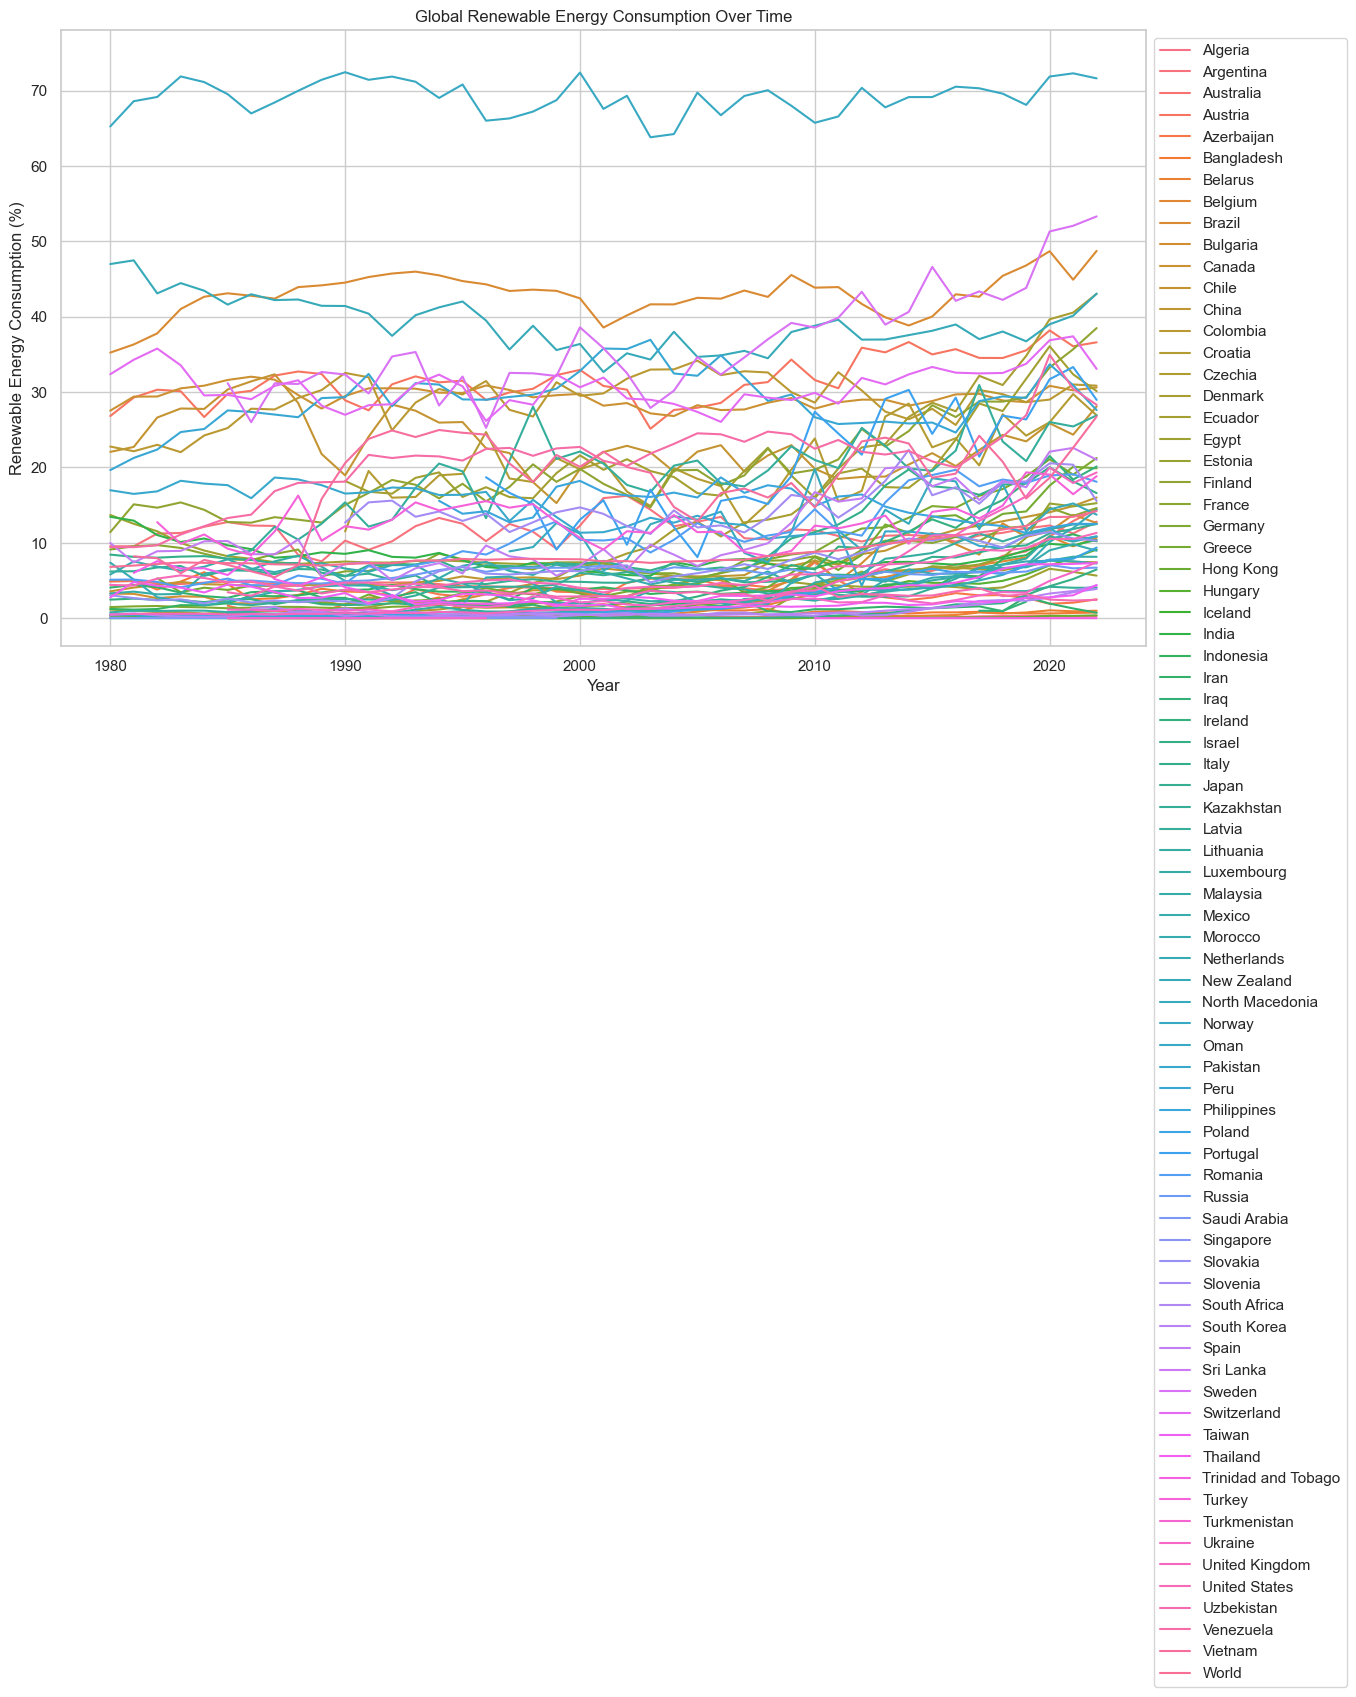

In [46]:
# Set the style for the plots
sns.set(style="whitegrid")

# Line plot of global renewable energy consumption over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df, x='Year', y='Renewables (% equivalent primary energy)', hue='Entity', estimator='mean', ci=None)
plt.title('Global Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

We do this for the carbon emissions as well, using a growth rate so we can have both variables in percentages.

Plotting carbon emissions over time

C:\Users\varun\AppData\Local\Temp\ipykernel_14532\2381214109.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df, x='Year', y='Annual CO₂ emissions', hue='Entity', estimator='mean', ci=None)


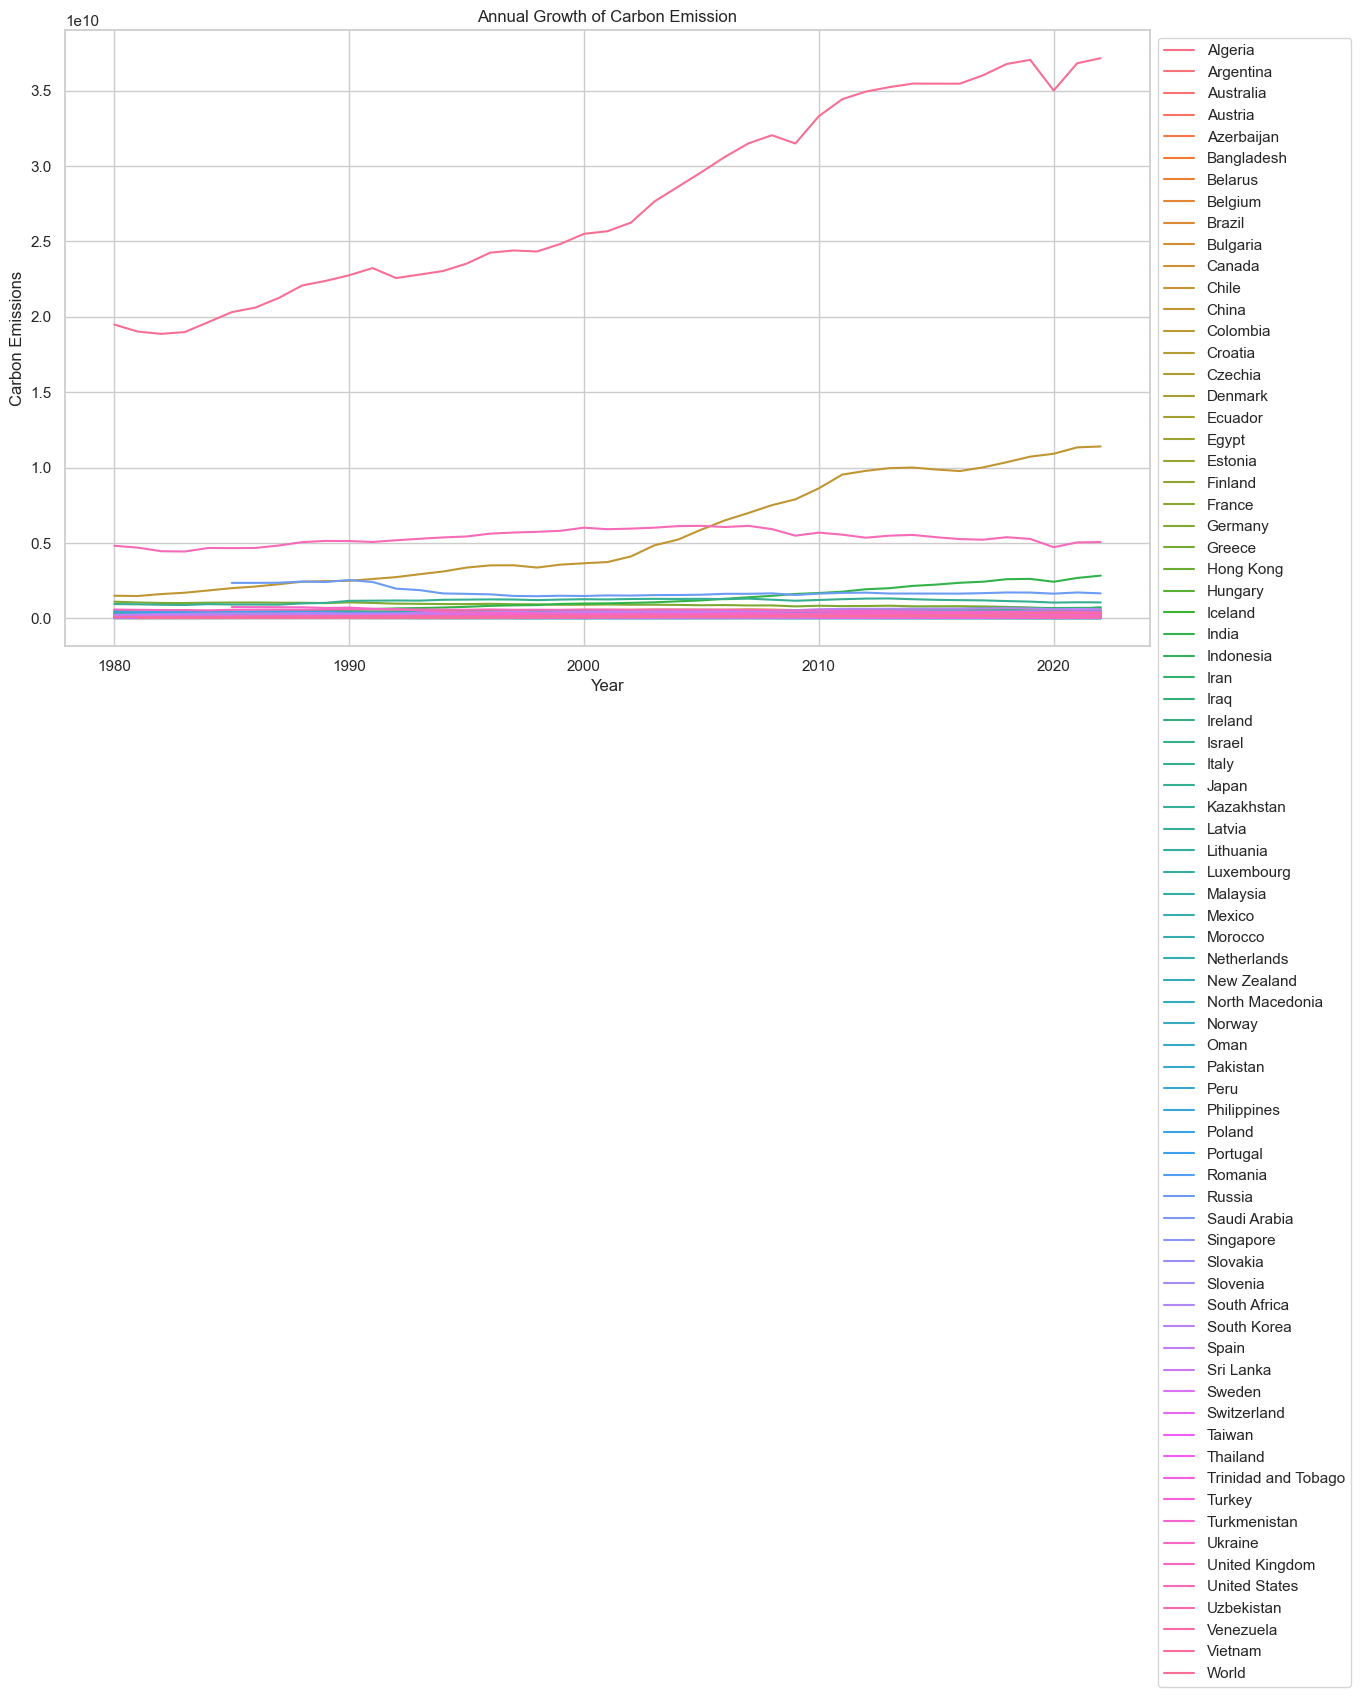

In [47]:

# Plot Carbon Emissions Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_df, x='Year', y='Annual CO₂ emissions', hue='Entity', estimator='mean', ci=None)
plt.title('Annual Growth of Carbon Emission')
plt.xlabel('Year')
plt.ylabel('Carbon Emissions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Now we want to plot our two variables against each other to see the relationship between them. We now plot renewable energy against carbon emissions in the same type of graph.

Plot of Relationship Between Renewable Energy Consumption and Carbon Emissions

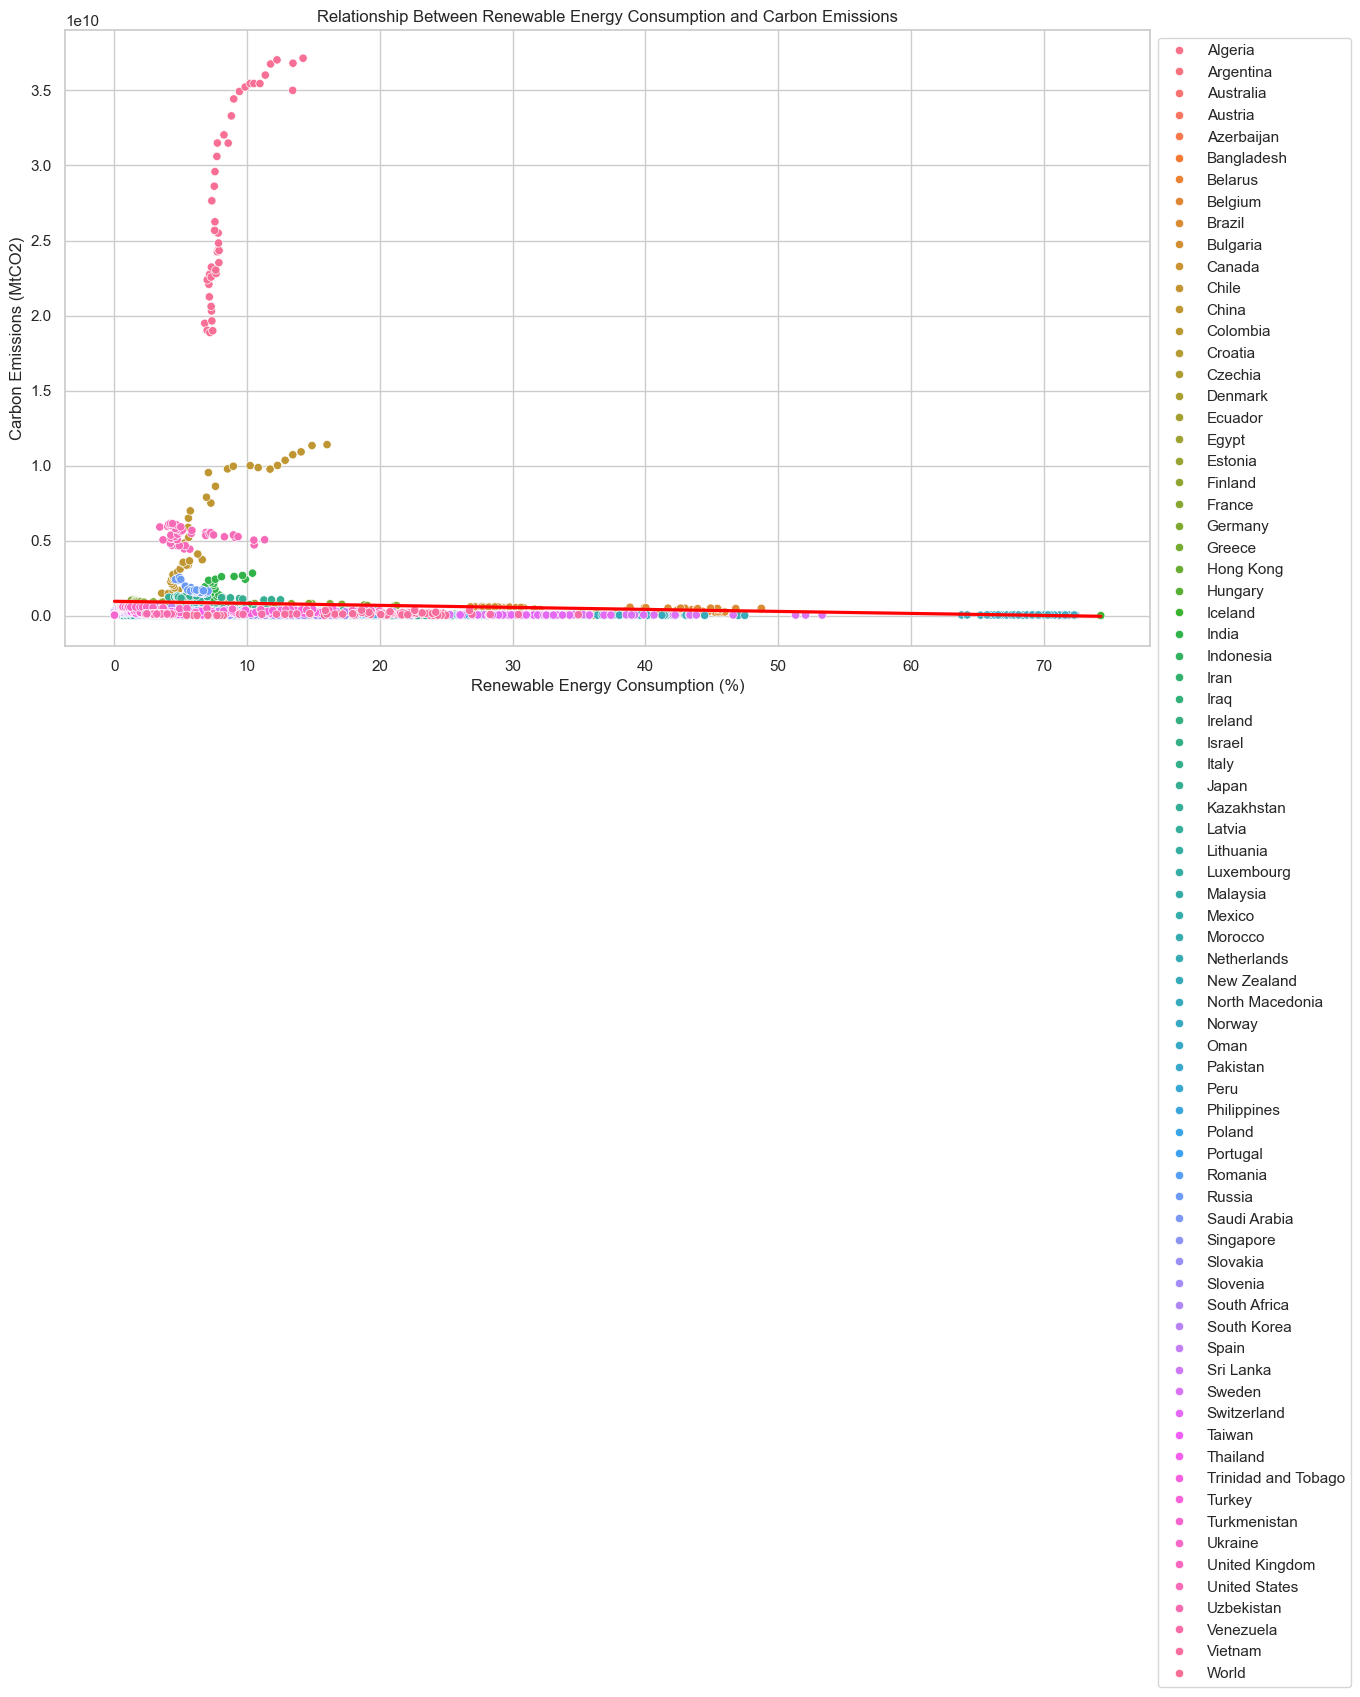

In [48]:
# Scatter plot with regression line
plt.figure(figsize=(14, 8))
sns.scatterplot(data=merged_df, x='Renewables (% equivalent primary energy)', y='Annual CO₂ emissions', hue='Entity')
sns.regplot(data=merged_df, x='Renewables (% equivalent primary energy)', y='Annual CO₂ emissions', scatter=False, color='red')
plt.title('Relationship Between Renewable Energy Consumption and Carbon Emissions')
plt.xlabel('Renewable Energy Consumption (%)')
plt.ylabel('Carbon Emissions (MtCO2)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

This graph is very useful because we can identify patterns of data for specific countries, or all at the same time. We see a regression line that is slightly negative but rather flat, indicating that as renwable energy consumption increases, carbon emissions tend to stay the same. We now want something concrete, so we can calculate the actual linear correlation for the data as a whole to see the exact strength of a linear relationship. 

Below we create a correlation matrix which displays the correlation coefficent between the two variables. A correlation coefficient lies between -1 and 1 (-1 meaning a negative correlation and 1 being positive), and the closer the value is to 1 or -1, the more indicitive it is of a linear correlation. Since we get -.0.05 which is very close to zero, it is fair to say there does not exist a strong linear relationship in our overall data.

Calculate correlation matrix

In [49]:
# Calculate the correlation matrix
correlation_matrix = merged_df[['Renewables (% equivalent primary energy)', 'Annual CO₂ emissions']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                          Renewables (% equivalent primary energy)  \
Renewables (% equivalent primary energy)                                  1.000000   
Annual CO₂ emissions                                                     -0.049471   

                                          Annual CO₂ emissions  
Renewables (% equivalent primary energy)             -0.049471  
Annual CO₂ emissions                                  1.000000  


How about now we check the correlation for a specific country, rather than the entire data overall. It is important to consider that other relationships exists apart from linear, including exponential, logorithmic, quadratic, etc. 

We choose World as an example, because the data looks quadratic. Now let use use quadratic regression to calculate a regression coefficient. We get a value of 0.78 which is close to 1, indicating a rather strong quadratic relationship. 

Even though the entire dataset could be expressed with a linear regression line, the specific world category can be expressed best as a quadratic regression line. This should teach us that data can be expressed in many ways and we must choose the most optimal way to better understand our results.

Quadratic regression for world

In [50]:
# Choose a specific country for correlation analysis
selected_country = 'World'

# Filter the dataset for the selected country
selected_country_df = merged_df[merged_df['Entity'] == selected_country]

# Compute the quadratic correlation coefficient
x = selected_country_df['Renewables (% equivalent primary energy)']
y = selected_country_df['Annual CO₂ emissions']

# Calculate the quadratic correlation coefficient
quadratic_correlation = np.corrcoef(x**2, y)[0, 1]

print("\nQuadratic Correlation for", selected_country, ":", quadratic_correlation)


Quadratic Correlation for World : 0.7847325111357496


Another observation we can make in the relationship graph is that China's trend looks both linear and quadratic. We can do both linear and quadratic regression to find which model fits the data better. Since the linear coefficient is closer to 1 than the quadratic one, we can assume that the relationship for that country is linear, meaning there is a constant increase in carbon emissions for every unit increased of renewable energy in China. Again we are finding ways to best represent our data.

Linear regression for China

In [51]:
selected_country = 'China'

# Filter the dataset for the selected country
selected_country_df = merged_df[merged_df['Entity'] == selected_country]
# Calculate the correlation matrix
correlation_matrix = selected_country_df[['Renewables (% equivalent primary energy)', 'Annual CO₂ emissions']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                          Renewables (% equivalent primary energy)  \
Renewables (% equivalent primary energy)                                  1.000000   
Annual CO₂ emissions                                                      0.898362   

                                          Annual CO₂ emissions  
Renewables (% equivalent primary energy)              0.898362  
Annual CO₂ emissions                                  1.000000  


Quadratic Regression for China

In [52]:
# Calculated regression for overall countries to be linear pretty much with little negative effect but do by a couple countries as well
# Choose a specific country for correlation analysis
selected_country = 'China'

# Filter the dataset for the selected country
selected_country_df = merged_df[merged_df['Entity'] == selected_country]

# Compute the quadratic correlation coefficient
x = selected_country_df['Renewables (% equivalent primary energy)']
y = selected_country_df['Annual CO₂ emissions']

# Calculate the quadratic correlation coefficient
quadratic_correlation = np.corrcoef(x**2, y)[0, 1]

print("\nQuadratic Correlation for", selected_country, ":", quadratic_correlation)
# so linear model better for that country


Quadratic Correlation for China : 0.8384702330925562


## Hypothesis Testing and Machine Learning
In our third phase of the data science process, we get to hypothesis testing and machine learning. Hypothesis testing is a way to statistically analyze our data with a given significance level. It consists of the null hypothesis and alternate hypothesis. The null hypothesis is the hypothesis that there is no correlation, and is the default assumption. The alternative hypothesis is what you want to prove, and it represents a correlation. We obtain a p value which basically tells us how confident we are in our significance, and if it is under a specific significance level that means we are confident that there is a correlation. A common significance level is 0.05 so we will use that.

Let us start with hypothesis testing if there is a significant relationship between our two variables using pearsonr. We get a p value that is less than our signficance level meaning we can reject our null hypothesis and prove that there is a significant relationship between our variables.

Hypthosis testing 

In [53]:

# Pearsonr
correlation, p_value = pearsonr(merged_df['Renewables (% equivalent primary energy)'], merged_df['Annual CO₂ emissions'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare p-value with significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between renewable energy consumption and carbon emissions.")
else:
    print("Fail to reject the null hypothesis. There is not a significant relationship between renewable energy consumption and carbon emissions.")


Pearson Correlation Coefficient: -0.049470512589779025
P-value: 0.008565942073703673
Reject the null hypothesis. There is a significant relationship between renewable energy consumption and carbon emissions.


We end off our data science journey with machine learning. We can perform several machine learning modeling techniques in order to predict data based on existing data. This allows us to predict values beyond our given time frame with good confidence, if we pick the right model. For example, we can use a linear regression model to predict how renewable energy and carbon emissions will change in the next few decades, even if we don't have those specific points. We will attempt that below. Another technique that can be useful is clustering, to group countries based on their renewable energy adoption patterns. This way we can see if certain countries are similar, and research those similarities outside of data to see what policies they implement and use.

First we use regression analysis to create a predictor model. In machine learning, a training set is the data that we feed our model, and it uses this data to make predictions about data in the training set. In this case, we make 20% of our data to be the test set, while everything else is the training set. After training out model, we use a statistic called mean squared error to calculate how close our predictions are to the actual values, and a low mse indicates that our model is good. More information about mean squared error can be found here: https://en.wikipedia.org/wiki/Mean_squared_error. Let's use our model to predict how high carbon emissions were to be if we used 0% renewable energy in china. We get an absurdly high number, showing how detrimental non-renwable energy can be for carbon emissions.

Lastly we use clustering analysis to create groups of data. We first use the elbow method method for k means clustering to find the optimal amount of clusters in our data. We want the sum of squares to be the least for the optimal number of clusters, given the fact that adding one more cluster wouldn't significantly impact the sum of squares. We find the optimal number of clusters to be 3 from the graph. More information on the elbow mwthod and k means clustering can be found here: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=Elbow%20Method%20Definition&text=It%20involves%20plotting%20the%20variance,for%20analysis%20or%20model%20training. Now we use K-means to split our data into three clusters. We can see each cluster has a different type of relationship: one linear and flat, one quadratic, and one a mix of both. This data can give people future work to do. Policy makers can analyze what the countries in a specific cluster like the quadratic one do specifically policy wise to promote a healthy planet and discourage those policies globally, because they are using too much carbon emissions.

Mean Squared Error: 1.1001644914250854e+19
Predicted carbon emissions for China with 0% renewable energy consumption: 989354408.28 MtCO2


C:\Users\varun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


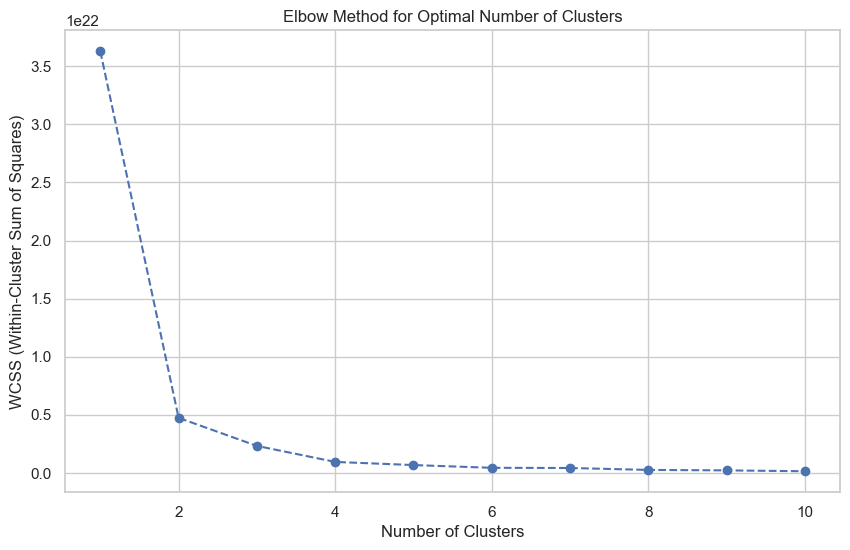

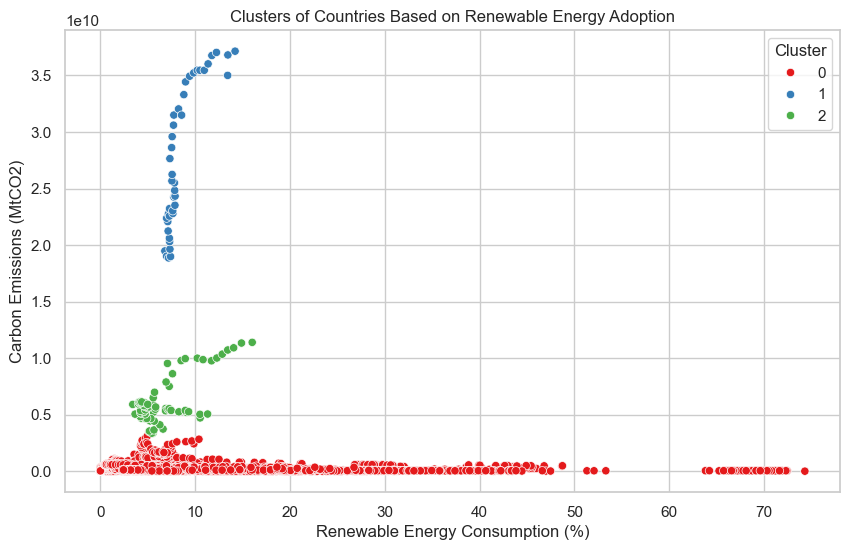

In [54]:


# Regression Analysis
X = merged_df[['Renewables (% equivalent primary energy)']]
y = merged_df['Annual CO₂ emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Example total energy consumption for China in %
Total_Energy_Consumption_China = 0  # Replace with the actual total energy consumption for China

# Use the trained linear regression model to predict carbon emissions for 100% renewable energy consumption
renewable_energy_0 = np.array([[Total_Energy_Consumption_China]])
predicted_emissions_0_renewable = model.predict(renewable_energy_0)

print(f"Predicted carbon emissions for China with 0% renewable energy consumption: {predicted_emissions_0_renewable[0]:.2f} MtCO2")

# Clustering Analysis
features = merged_df[['Renewables (% equivalent primary energy)', 'Annual CO₂ emissions']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(features)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Renewables (% equivalent primary energy)', y='Annual CO₂ emissions', hue='Cluster', palette='Set1')
plt.title('Clusters of Countries Based on Renewable Energy Adoption')
plt.xlabel('Renewable Energy Consumption (%)')
plt.ylabel('Carbon Emissions (MtCO2)')
plt.legend(title='Cluster')
plt.show()


## Insights from this Project
Insights were described throughout each step of this project, but we can reiterate them once again.

This is the last stage of our cycle. We now utilize our conducted data analysis to draw conclusions that can be supported with evidence.

Using our analysis and modeling as evidence, we can say that:

1- Renewable energy consumption over time varies by different countries

2- Carbon emissions over time have generally increased or stayed the same for most countries

3- There is no clear relationship between renewable energy consumption and carbon emissions, but as we analyze differetn countries we can see that there are clear relationships

4- There are three groups of countries that have similar carbon emissions per renewable energy consumption

Overall, we can use this data and analysis to provide information to global decision makers to analyze policy in countries that have been dealing with the environent well or poorly, and encourage and discourage certain polcies.

Further research could include expanding our dataset and increasing the scope of our data by adding more variables. We can fill in the missing data instead of removing it as it could have been significant. We can also look by month or day rather than year to get a more specific time frame.

We hope that seeing the entire data science cycle has been informative in teaching you how to effectively view and manipulate data.